### Computation with Xarray

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
url = 'https://esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
# The time_bnds variable complicates some operations, therefore
# it will be dropped after the data is downloaded
ds = xr.open_dataset(url, drop_variables=['time_bnds'])

Note:Caching=1


In [5]:
ds = ds.sel(time=slice('1960', '2020'))
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 732)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2022-10-04
    DODS_EXTRA.Unlimited_Dimension:  time

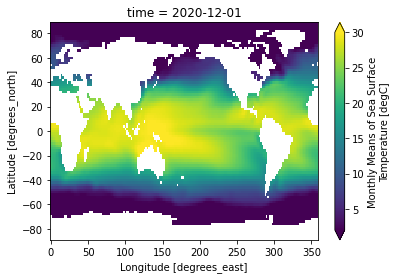

In [7]:
ds.sst[len(ds.sst) - 1].plot(vmin=2, vmax=30) # plotting the last variable in the dataset

In [6]:
sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 732, lat: 89, lon: 180)>
[11726640 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [9]:
sst.shape

(732, 89, 180)

In [10]:
sst[2].shape

(89, 180)

In [11]:
sst

<xarray.DataArray 'sst' (time: 732, lat: 89, lon: 180)>
[11726640 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [7]:
# Attributes are lost after performing calculations
# set keep_attrs as True to preserve them
xr.set_options(keep_attrs=True)

In [8]:
sst_kelvin = sst + 273.15
sst_kelvin

<xarray.DataArray 'sst' (time: 732, lat: 89, lon: 180)>
array([[[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
...
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [9]:
f = 0.5 * np.log(sst_kelvin**2)
f

<xarray.DataArray 'sst' (time: 732, lat: 89, lon: 180)>
array([[[5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        ...,
...
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        [5.60341, 5.60341, 5.60341, ..., 5.60341, 5.60341, 5.60341],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

### Reductions

In [11]:
sst.mean(axis=0) # Using the dimension index

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7994958, -1.7995222, -1.7995416, ..., -1.7995893, -1.7995241,
        -1.7994775],
       [-1.7995195, -1.7994728, -1.7994453, ..., -1.799864 , -1.7996647,
        -1.7995903],
       [-1.7999902, -1.7998314, -1.7997273, ..., -1.799885 , -1.7999297,
        -1.7999711],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [15]:
sst.mean(dim='time') # Using the name of the dimension

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7994958, -1.7995222, -1.7995416, ..., -1.7995893, -1.7995241,
        -1.7994775],
       [-1.7995195, -1.7994728, -1.7994453, ..., -1.799864 , -1.7996647,
        -1.7995903],
       [-1.7999902, -1.7998314, -1.7997273, ..., -1.799885 , -1.7999297,
        -1.7999711],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

#### Excersice:
Plot the mean over lon and lat
Bonus: Plot the resulting Time Series

In [12]:
# This would be like calculating the mean sea surface temperature for each of the values in the time axis.
# Basically, it would be the daily mean temperature on the planet
mean_sst= sst.mean(dim=('lat', 'lon'))
mean_sst

<xarray.DataArray 'sst' (time: 732)>
array([13.447333 , 13.538178 , 13.560617 , 13.449021 , 13.469315 ,
       13.454981 , 13.72113  , 13.916064 , 13.822409 , 13.53989  ,
       13.323178 , 13.364261 , 13.491084 , 13.624221 , 13.623529 ,
       13.525916 , 13.48518  , 13.5291395, 13.710998 , 13.902636 ,
       13.786833 , 13.500918 , 13.322204 , 13.324784 , 13.4614725,
       13.554375 , 13.570085 , 13.467039 , 13.464627 , 13.515269 ,
       13.7487135, 13.86036  , 13.797006 , 13.499739 , 13.294295 ,
       13.312595 , 13.420587 , 13.541743 , 13.535124 , 13.477131 ,
       13.4698715, 13.525112 , 13.6962595, 13.918255 , 13.764984 ,
       13.465238 , 13.324522 , 13.340322 , 13.438337 , 13.514883 ,
       13.488945 , 13.367167 , 13.350077 , 13.449749 , 13.60579  ,
       13.718753 , 13.616768 , 13.327129 , 13.127264 , 13.148032 ,
       13.36128  , 13.472328 , 13.458139 , 13.388378 , 13.31617  ,
       13.415058 , 13.603073 , 13.795105 , 13.720209 , 13.420439 ,
       13.248442 , 13.274323 , 13.424941 , 13.506327 , 13.517883 ,
       13.4329195, 13.372339 , 13.450058 , 13.671843 , 13.779454 ,
       13.685076 , 13.430487 , 13.293945 , 13.326498 , 13.416443 ,
       13.515367 , 13.532816 , 13.443419 , 13.459111 , 13.521452 ,
       13.673624 , 13.855462 , 13.68534  , 13.458884 , 13.242759 ,
       13.240546 , 13.329314 , 13.464171 , 13.442738 , 13.397366 ,
...
       13.726007 , 13.810887 , 13.928126 , 13.914392 , 13.849113 ,
       13.829185 , 13.906806 , 14.196968 , 14.376314 , 14.232174 ,
       13.9054365, 13.722456 , 13.693708 , 13.829052 , 13.945443 ,
       13.955972 , 13.92339  , 13.910376 , 14.046299 , 14.27618  ,
       14.490504 , 14.347755 , 13.982319 , 13.757795 , 13.768961 ,
       13.901341 , 13.996684 , 14.026611 , 13.984942 , 13.980217 ,
       14.073199 , 14.317961 , 14.520835 , 14.44087  , 14.147829 ,
       13.924267 , 13.926875 , 14.107754 , 14.164714 , 14.170453 ,
       14.070021 , 14.0252495, 14.159685 , 14.4065   , 14.590414 ,
       14.466488 , 14.153036 , 13.867566 , 13.857481 , 14.033022 ,
       14.145955 , 14.134974 , 14.050254 , 13.982915 , 14.098937 ,
       14.381255 , 14.556869 , 14.389342 , 14.086057 , 13.84897  ,
       13.801766 , 13.931573 , 14.034624 , 14.039654 , 13.992429 ,
       13.96112  , 14.027793 , 14.256078 , 14.475453 , 14.393923 ,
       14.142363 , 13.895091 , 13.891839 , 13.992805 , 14.110282 ,
       14.108567 , 14.032483 , 13.992964 , 14.136986 , 14.406088 ,
       14.601887 , 14.442921 , 14.129114 , 13.911966 , 13.896434 ,
       14.062862 , 14.147016 , 14.153968 , 14.08392  , 14.007485 ,
       14.104941 , 14.409259 , 14.596707 , 14.412094 , 14.070637 ,
       13.801601 , 13.749018 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

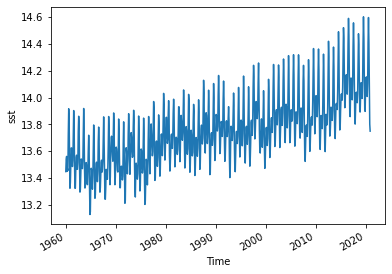

In [17]:
mean_sst.plot() # Mean daily sea surface temperature

In [20]:
# Weight factor created from the cosine of the latitude
weights = np.cos(np.deg2rad(ds.lat))
weights

<xarray.DataArray 'lat' (lat: 89)>
array([0.0348995 , 0.06975651, 0.10452842, 0.1391731 , 0.17364822,
       0.20791166, 0.2419219 , 0.2756374 , 0.30901697, 0.34202015,
       0.37460664, 0.4067366 , 0.43837115, 0.4694716 , 0.49999997,
       0.52991927, 0.5591929 , 0.5877853 , 0.6156615 , 0.64278764,
       0.66913056, 0.6946584 , 0.7193398 , 0.7431448 , 0.76604444,
       0.7880108 , 0.809017  , 0.8290376 , 0.8480481 , 0.8660254 ,
       0.88294756, 0.89879405, 0.9135454 , 0.92718387, 0.9396926 ,
       0.95105654, 0.9612617 , 0.9702957 , 0.9781476 , 0.9848077 ,
       0.99026805, 0.9945219 , 0.9975641 , 0.99939084, 1.        ,
       0.99939084, 0.9975641 , 0.9945219 , 0.99026805, 0.9848077 ,
       0.9781476 , 0.9702957 , 0.9612617 , 0.95105654, 0.9396926 ,
       0.92718387, 0.9135454 , 0.89879405, 0.88294756, 0.8660254 ,
       0.8480481 , 0.8290376 , 0.809017  , 0.7880108 , 0.76604444,
       0.7431448 , 0.7193398 , 0.6946584 , 0.66913056, 0.64278764,
       0.6156615 , 0.5877853 , 0.5591929 , 0.52991927, 0.49999997,
       0.4694716 , 0.43837115, 0.4067366 , 0.37460664, 0.34202015,
       0.30901697, 0.2756374 , 0.2419219 , 0.20791166, 0.17364822,
       0.1391731 , 0.10452842, 0.06975651, 0.0348995 ], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    units:               degrees_north
    long_name:           Latitude
    actual_range:        [ 88. -88.]
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  center

In [21]:
(sst * weights)

<xarray.DataArray (time: 732, lat: 89, lon: 180)>
array([[[-0.06281909, -0.06281909, -0.06281909, ..., -0.06281909,
         -0.06281909, -0.06281909],
        [-0.12556171, -0.12556171, -0.12556171, ..., -0.12556171,
         -0.12556171, -0.12556171],
        [-0.18815115, -0.18815115, -0.18815115, ..., -0.18815115,
         -0.18815115, -0.18815115],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.06281909, -0.06281909, -0.06281909, ..., -0.06281909,
         -0.06281909, -0.06281909],
        [-0.12556171, -0.12556171, -0.12556171, ..., -0.12556171,
         -0.12556171, -0.12556171],
        [-0.18815115, -0.18815115, -0.18815115, ..., -0.18815115,
         -0.18815115, -0.18815115],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.06281909, -0.06281909, -0.06281909, ..., -0.06281909,
         -0.06281909, -0.06281909],
        [-0.12556171, -0.12556171, -0.12556171, ..., -0.12556171,
         -0.12556171, -0.12556171],
        [-0.18815115, -0.18815115, -0.18815115, ..., -0.18815115,
         -0.18815115, -0.18815115],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01

In [23]:
sst_weighted = sst.weighted(weights)
sst_weighted

DataArrayWeighted with weights along dimensions: lat

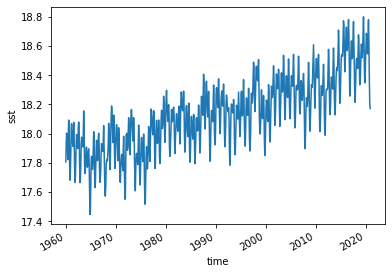

In [24]:
sst_weighted.mean(dim=('lon', 'lat')).plot() # weighted mean

### Groupby

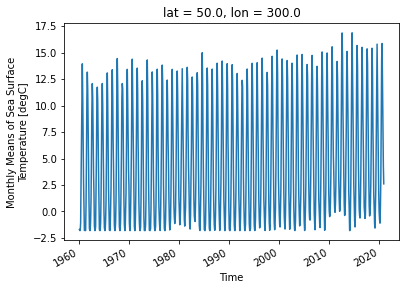

In [13]:
sst.sel(lon=300, lat=50).plot()

In [14]:
group = sst.groupby('time.month')
group

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [15]:
for group_name, group_da in group:
    break
print(group_name)
group_da

1


<xarray.DataArray 'sst' (time: 61, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1961-01-01 ... 2020-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [28]:
group.map(np.mean)

<xarray.DataArray 'sst' (month: 12)>
array([13.671669 , 13.780417 , 13.77687  , 13.69628  , 13.6538725,
       13.726396 , 13.93777  , 14.110548 , 13.996772 , 13.7045555,
       13.517994 , 13.539068 ], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [16]:
def time_mean(a):
    return a.mean(dim='time')

group.map(time_mean)

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.7995573, -1.7996469, -1.7998639, ..., -1.7997986,
         -1.7996793, -1.7995532],
        [-1.7996129, -1.799787 , -1.8000009, ..., -1.8000009,
         -1.7998291, -1.7996366],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [17]:
sst_mm = group.mean(dim='time')
sst_mm

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.7995573, -1.7996469, -1.7998639, ..., -1.7997986,
         -1.7996793, -1.7995532],
        [-1.7996129, -1.799787 , -1.8000009, ..., -1.8000009,
         -1.7998291, -1.7996366],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

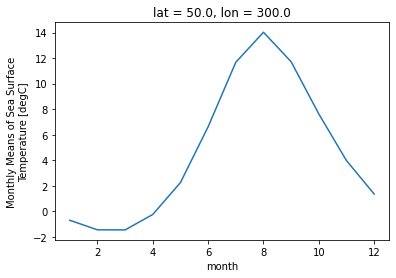

In [18]:
sst_mm.sel(lon=300, lat=50).plot()

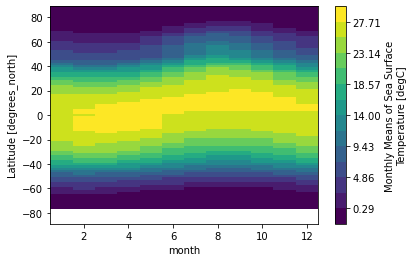

In [21]:
sst_mm.mean(dim='lon').plot(x='month', levels=15, vmin=-2, vmax=30)

In [23]:
# transformation
def remove_time_mean(x):
    return x - x.mean(dim='time')

sst_anom = sst.groupby('time.month').map(remove_time_mean)
sst_anom

<xarray.DataArray 'sst' (time: 732, lat: 89, lon: 180)>
array([[[ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-4.4262409e-04, -3.5309792e-04, -1.3601780e-04, ...,
         -2.0134449e-04, -3.2067299e-04, -4.4679642e-04],
        [-3.8707256e-04, -2.1290779e-04,  9.5367432e-07, ...,
          9.5367432e-07, -1.7082691e-04, -3.6334991e-04],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [24]:
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 732)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float32 9.537e-07 9.537e-07 9.537e-07 ... nan nan

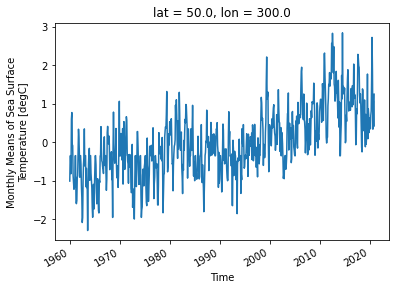

In [25]:
ds_anom.sst.sel(lon=300, lat=50).plot()

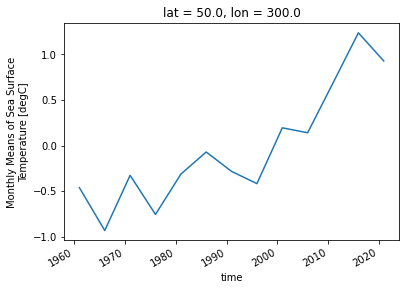

In [26]:
# Resampling
sst_5yr_mean = ds_anom.sst.resample(time='5Y').mean(dim='time')
sst_5yr_mean.sel(lon=300, lat=50).plot()